In [45]:
!pip install yfinance
!pip install --upgrade numpy

In [46]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score


In [47]:
sp500 = yf.Ticker("^GSPC")

In [48]:
type(sp500)

yfinance.ticker.Ticker

In [49]:
sp500 = sp500.history(period="max")

In [50]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-04 00:00:00-04:00,4513.959961,4540.339844,4474.549805,4478.029785,4143310000,0.0,0.0
2023-08-07 00:00:00-04:00,4491.580078,4519.839844,4491.149902,4518.439941,3493920000,0.0,0.0
2023-08-08 00:00:00-04:00,4498.029785,4503.310059,4464.390137,4499.379883,3884910000,0.0,0.0


In [51]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-07-28 00:00:00-04:00', '2023-07-31 00:00:00-04:00',
               '2023-08-01 00:00:00-04:00', '2023-08-02 00:00:00-04:00',
               '2023-08-03 00:00:00-04:00', '2023-08-04 00:00:00-04:00',
               '2023-08-07 00:00:00-04:00', '2023-08-08 00:00:00-04:00',
               '2023-08-09 00:00:00-04:00', '2023-08-10 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24017, freq=None)

<AxesSubplot:xlabel='Date'>

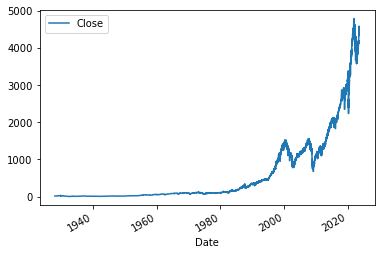

In [52]:
sp500.plot.line(y="Close",use_index=True)

In [53]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [54]:
sp500["tomorrow"] = sp500["Close"].shift(-1)

In [55]:
sp500

,Open,High,Low,Close,Volume,tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-08-04 00:00:00-04:00,4513.959961,4540.339844,4474.549805,4478.029785,4143310000,4518.439941
2023-08-07 00:00:00-04:00,4491.580078,4519.839844,4491.149902,4518.439941,3493920000,4499.379883
2023-08-08 00:00:00-04:00,4498.029785,4503.310059,4464.390137,4499.379883,3884910000,4467.709961


In [56]:
sp500["Target"]= (sp500["tomorrow"]>sp500["Close"]).astype(int)

In [57]:
sp500

,Open,High,Low,Close,Volume,tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-08-04 00:00:00-04:00,4513.959961,4540.339844,4474.549805,4478.029785,4143310000,4518.439941,1
2023-08-07 00:00:00-04:00,4491.580078,4519.839844,4491.149902,4518.439941,3493920000,4499.379883,0
2023-08-08 00:00:00-04:00,4498.029785,4503.310059,4464.390137,4499.379883,3884910000,4467.709961,0


In [58]:
sp500=sp500.loc["1990-01-01":].copy()

<AxesSubplot:xlabel='Date'>

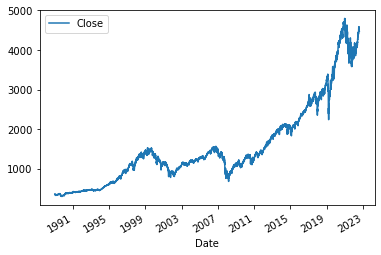

In [59]:
sp500.plot.line(y="Close",use_index=True)

In [60]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train=sp500.iloc[:-100]
test=sp500.iloc[-100:]

predictors =["Close","Open","Volume","High","Low"]
model.fit(train[predictors],train["Target"])


RandomForestClassifier(min_samples_split=100, random_state=1)

In [61]:
preds = model.predict(test[predictors])

In [62]:
preds

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [97]:
import pandas as pd

preds = pd.Series(preds, index=test.index, name="Predictions")

In [98]:
preds

Date
2023-03-20 00:00:00-04:00    1
2023-03-21 00:00:00-04:00    0
2023-03-22 00:00:00-04:00    0
2023-03-23 00:00:00-04:00    0
2023-03-24 00:00:00-04:00    0
                            ..
2023-08-04 00:00:00-04:00    0
2023-08-07 00:00:00-04:00    1
2023-08-08 00:00:00-04:00    1
2023-08-09 00:00:00-04:00    1
2023-08-10 00:00:00-04:00    1
Name: Predictions, Length: 100, dtype: int32

In [100]:
precision_score(test["Target"],preds)

0.5789473684210527

In [66]:
combined=pd.concat([test["Target"],preds],axis=1)

<AxesSubplot:xlabel='Date'>

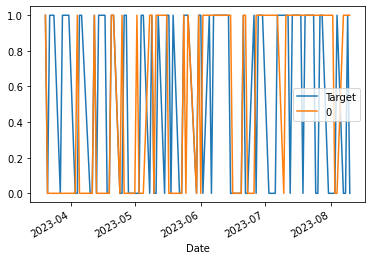

In [67]:
combined.plot()

## Building a Backtesting system 

In [72]:
def predict(test, train, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds_series = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds_series], axis=1)
    return combined

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    imputer = SimpleImputer(strategy="mean")
    
    for i in range(start, data.shape[0], step):
        test = data.iloc[0:i].copy()
        train = data.iloc[i:(i+step)].copy()
        
        # Impute missing values in test and train data
        test_imputed = imputer.fit_transform(test)
        train_imputed = imputer.transform(train)
        
        # Convert the imputed arrays back to DataFrames
        test_imputed = pd.DataFrame(test_imputed, columns=test.columns, index=test.index)
        train_imputed = pd.DataFrame(train_imputed, columns=train.columns, index=train.index)
        
        # Make predictions using the imputed data
        predictions = predict(test_imputed, train_imputed, predictors, model)
        all_predictions.append(predictions)
        
    return pd.concat(all_predictions)


In [73]:
predictions = backtest(sp500,model,predictors)

In [74]:
predictions["Predictions"].value_counts()

Predictions
1.0    99020
0.0    29980
Name: count, dtype: int64

In [75]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5347404564734397

In [76]:
horizons=[2,5,60,250,1000] #Hoirizons on which we want to see the rolling mean 

new_predictors=[]

for horizon in horizons:
    rolling_averages= sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column]=sp500["Close"]/rolling_averages["Close"]
    
    trend_column =f"Trend_{horizon}"
    sp500[trend_column]=sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors +=[ratio_column, trend_column]

In [77]:
sp500

,Open,High,Low,Close,Volume,tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-04 00:00:00-04:00,4513.959961,4540.339844,4474.549805,4478.029785,4143310000,4518.439941,1,0.997343,0.0,0.988135,1.0,1.026023,34.0,1.102385,120.0,1.169678,535.0
2023-08-07 00:00:00-04:00,4491.580078,4519.839844,4491.149902,4518.439941,3493920000,4499.379883,0,1.004492,1.0,1.000165,1.0,1.033779,34.0,1.111919,121.0,1.179718,535.0
2023-08-08 00:00:00-04:00,4498.029785,4503.310059,4464.390137,4499.379883,3884910000,4467.709961,0,0.997886,1.0,0.999368,1.0,1.027972,34.0,1.106818,121.0,1.174248,534.0


In [106]:
model = RandomForestClassifier(n_estimators=500, min_samples_split=100, random_state=1)

In [107]:
def predict(test, train, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    
    preds[preds>=0.7]=1
    preds[preds<0.7]=0
    
    preds_series = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds_series], axis=1)
    return combined

In [108]:
predict=backtest(sp500,model,new_predictors)

In [109]:
predictions["Predictions"].value_counts()

Predictions
1.0    99020
0.0    29980
Name: count, dtype: int64

In [110]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5347404564734397

# Explore Commodities

In [115]:
steel = yf.Ticker("STEEL")
steel = steel.history(period="max")

In [116]:
steel

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-10-10 00:00:00-04:00,1091.709961,1091.709961,1091.709961,1091.709961,0,0.0,0.0
2006-12-29 00:00:00-05:00,1251.930054,1251.930054,1251.930054,1251.930054,0,0.0,0.0
2007-05-09 00:00:00-04:00,1753.859985,1753.859985,1753.859985,1753.859985,0,0.0,0.0
2007-05-14 00:00:00-04:00,1721.270020,1721.270020,1721.270020,1721.270020,0,0.0,0.0
2007-05-30 00:00:00-04:00,1759.150024,1759.150024,1759.150024,1759.150024,0,0.0,0.0
...,...,...,...,...,...,...,...
2020-04-23 00:00:00-04:00,644.956970,644.956970,644.956970,644.956970,0,0.0,0.0
2020-04-24 00:00:00-04:00,636.463989,636.463989,636.463989,636.463989,0,0.0,0.0
2020-04-27 00:00:00-04:00,661.958984,661.958984,661.958984,661.958984,0,0.0,0.0


<AxesSubplot:xlabel='Date'>

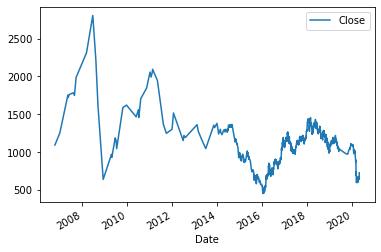

In [117]:
steel.plot.line(y="Close",use_index=True)